In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm


In [3]:
# Path to dataset
train_images_path = r"C:\Users\71591\Desktop\dataset\trainNN2\train"
train_labels_path = r"C:\Users\71591\Desktop\dataset\trainLabels (1).csv"

# Load the labels CSV
labels_df = pd.read_csv(train_labels_path)

# Display the first few rows of the labels dataframe
print(labels_df)
print("Number of unique classes:", labels_df['label'].nunique())


          id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]
Number of unique classes: 10


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm  # For progress tracking

# Paths
train_images_path = r"C:\Users\71591\Desktop\dataset\trainNN2\train"
train_labels_path = r"C:\Users\71591\Desktop\dataset\trainLabels (1).csv"

# Load labels
labels_df = pd.read_csv(train_labels_path)

# Initialize arrays for images and labels
images = []
labels = []

# Load and preprocess images
for idx, row in tqdm(labels_df.iterrows(), total=labels_df.shape[0]):
    # Build image path
    img_path = os.path.join(train_images_path, str(row['id']) + '.png')  # Assuming filenames are like '1.png', '2.png', ...
    # Load image
    img = load_img(img_path, target_size=(32, 32))  # CIFAR-10 images are 32x32
    # Convert image to numpy array and normalize
    img_array = img_to_array(img) / 255.0
    images.append(img_array)
    labels.append(row['label'])

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
unique_labels = labels_df['label'].unique()
label_map = {label: idx for idx, label in enumerate(unique_labels)}  # Map each label to a number
labels_encoded = np.array([label_map[label] for label in labels])  # Encode the labels
labels_categorical = to_categorical(labels_encoded, num_classes=len(unique_labels))  # One-hot encode


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [22:00<00:00, 37.86it/s]


In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Display shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (40000, 32, 32, 3), (40000, 10)
Test set: (10000, 32, 32, 3), (10000, 10)


In [6]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # (40000, 3072)
X_test_flat = X_test.reshape(X_test.shape[0], -1)    # (10000, 3072)

print(f"Flattened training set: {X_train_flat.shape}")
print(f"Flattened test set: {X_test_flat.shape}")


Flattened training set: (40000, 3072)
Flattened test set: (10000, 3072)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the model
model_nn = Sequential()

# Input layer (3072 input nodes, corresponding to the flattened image size)
model_nn.add(Dense(512, activation='relu', input_shape=(3072,)))

# Dropout layer for regularization
model_nn.add(Dropout(0.5))

# Hidden layer
model_nn.add(Dense(256, activation='relu'))

# Dropout layer for regularization
model_nn.add(Dropout(0.5))

# Output layer (10 output nodes for 10 classes, with softmax activation)
model_nn.add(Dense(10, activation='softmax'))

# Compile the model
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model_nn.summary()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model_nn.fit(X_train_flat, y_train, epochs=10, batch_size=64, validation_data=(X_test_flat, y_test))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.1537 - loss: 2.3329 - val_accuracy: 0.2507 - val_loss: 2.0262
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.2054 - loss: 2.0808 - val_accuracy: 0.2716 - val_loss: 1.9926
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.2242 - loss: 2.0368 - val_accuracy: 0.2750 - val_loss: 1.9745
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.2293 - loss: 2.0246 - val_accuracy: 0.2780 - val_loss: 1.9604
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.2367 - loss: 1.9976 - val_accuracy: 0.2913 - val_loss: 1.9679
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.2383 - loss: 1.9965 - val_accuracy: 0.2685 - val_loss: 1.9579
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.2361 - loss: 1.9929 - val_accuracy: 0.2903 - val_loss: 1.9428
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.2438 - loss: 1.9883 - 

In [9]:
# Evaluate on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 2s - 5ms/step - accuracy: 0.2789 - loss: 1.9673
Test Accuracy: 27.89%


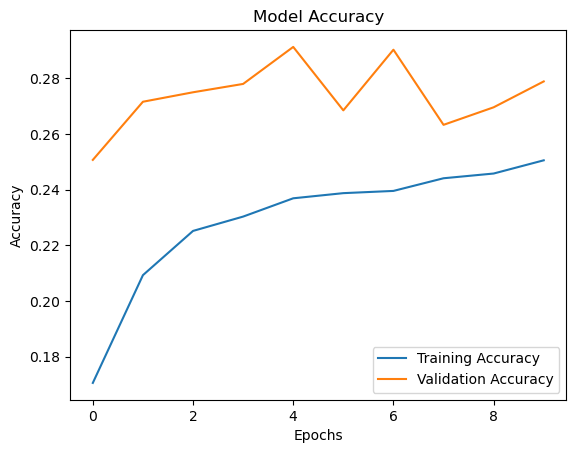

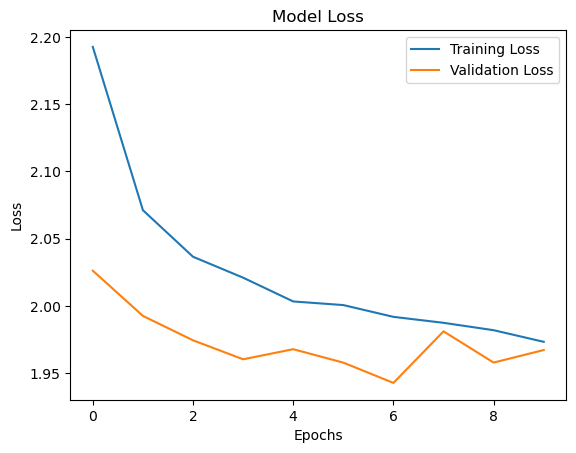

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model_cnn = Sequential([
    # Convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten layer
    Flatten(),

    # Fully connected (Dense) layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the CNN model
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_accuracy_cnn * 100:.2f}%")


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.2678 - loss: 1.9740 - val_accuracy: 0.4887 - val_loss: 1.4200
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.4575 - loss: 1.4970 - val_accuracy: 0.5559 - val_loss: 1.2778
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.5144 - loss: 1.3590 - val_accuracy: 0.5807 - val_loss: 1.1880
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.5510 - loss: 1.2643 - val_accuracy: 0.6156 - val_loss: 1.1012
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5764 - loss: 1.1871 - val_accuracy: 0.6201 - val_loss: 1.0830
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.5973 - loss: 1.1355 - val_accuracy: 0.6388 - val_loss: 1.0513
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6175 - loss: 1.0831 - val_accuracy: 0.6545 - val_loss: 0.9847
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6386 - loss: 1.0319 - 